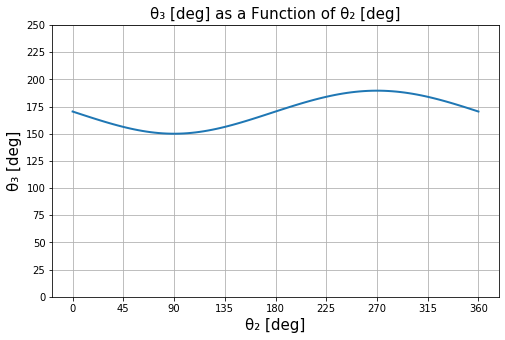

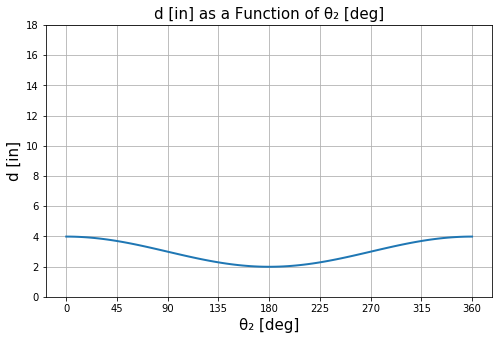

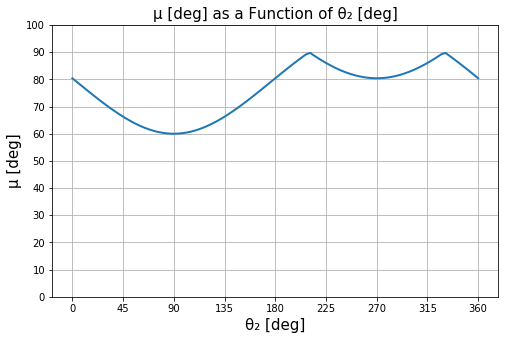

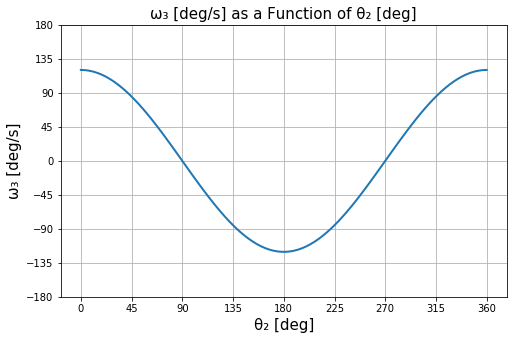

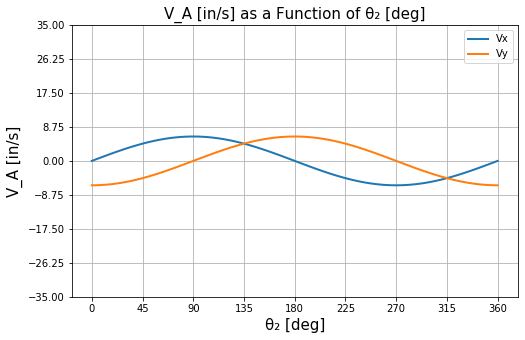

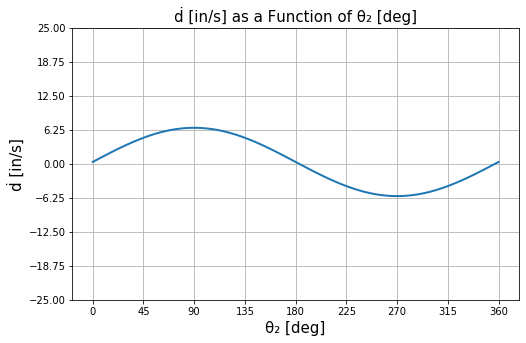

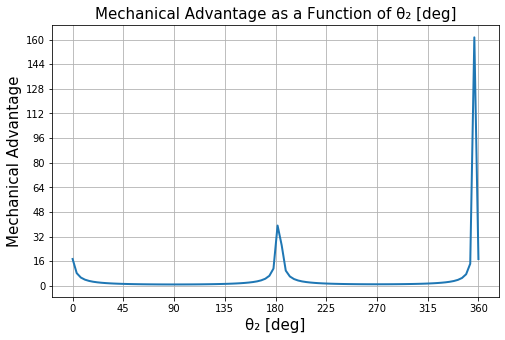

Input Values:
Positions: 
a [in] =  1
b [in] =  3
c [in] =  -0.5
θ₂ [deg]:  230

Velocities: 
ω₂ [deg/s] =  -360.0

Found Values:
Positions: 
θ₃ [deg] (open) =  185.09
d_max [in] =  3.97
d_min [in] =  1.94
Stroke length [in] =  2.03
d [in] =  2.35
μ [deg] =  84.91

Velocities: 
ω₃ [deg/s] =  -77.44
V_A [in/s] =  -4.813 + j4.039
ḋ [in/s] =  -4.45

Mechanical Advantage: 
m =  1.41


In [9]:
import numpy as np
import matplotlib.pyplot as plt

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


########################################################
#
#     ALL LENGTHS ARE IN INCHES
#     ALL ANGLES ARE REPORTED IN DEGREES
#     ANGULAR VELOCITY IS INPUT IN RADIANS PER SECOND
#
########################################################

#############  INPUTS



################## EXAMPLE VALUES
#a = 3.5
#b = 10
#c = 1
#th_2_fix = 120
#om_2 = -2*np.pi
##################



a = 1
b = 3
c = -.5
th_2_fix = 230
om_2 = -2*np.pi


#################### THETA 3

th_3_fix = np.degrees(np.arcsin((-a*np.sin(np.radians(th_2_fix))+c)/b)) + 180

d_max = np.sqrt((b+a)**2-c**2)
d_min = np.sqrt((b-a)**2-c**2)
stroke = d_max - d_min

th_2 = np.linspace(0,360,100)
th_3 = np.degrees(np.arcsin((-a*np.sin(np.radians(th_2))+c)/b)) + 180


y_ticks = np.linspace(0,250,11)
x_ticks = np.linspace(0,360,9)


fig = plt.figure(figsize = (8,5))
plt.plot(th_2,th_3, lw = 2)
plt.yticks(y_ticks)
plt.xticks(x_ticks)
plt.xlabel('\u03B8\u2082 [deg]', fontsize = 15)
plt.ylabel('\u03B8\u2083 [deg]', fontsize = 15)
plt.title('\u03B8\u2083 [deg] as a Function of \u03B8\u2082 [deg]', fontsize = 15 )
plt.grid()
plt.show()




###################### d



d_fix = a*np.cos(np.radians(th_2_fix)) - b*np.cos(np.radians(th_3_fix))
d = a*np.cos(np.radians(th_2)) - b*np.cos(np.radians(th_3_fix))

fig = plt.figure(figsize = (8,5))
plt.plot(th_2,d, lw = 2)

y_ticks = np.linspace(0,18,10)

plt.yticks(y_ticks)
plt.xticks(x_ticks)
plt.xlabel('\u03B8\u2082 [deg]', fontsize = 15)
plt.ylabel('d [in]', fontsize = 15)
plt.title('d [in] as a Function of \u03B8\u2082 [deg]', fontsize = 15 )
plt.grid()
plt.show()




############### TRANSMISSION ANGLE


mu_fix = np.abs(90-np.abs(th_3_fix-180))

mu = np.abs(90-np.abs(th_3-180))

fig = plt.figure(figsize = (8,5))
plt.plot(th_2,mu, lw = 2)

y_ticks = np.linspace(0,100,11)

plt.yticks(y_ticks)
plt.xticks(x_ticks)
plt.xlabel('\u03B8\u2082 [deg]', fontsize = 15)
plt.ylabel('\u03BC [deg]', fontsize = 15)
plt.title('\u03BC [deg] as a Function of \u03B8\u2082 [deg]', fontsize = 15 )
plt.grid()
plt.show()




############### OMEGA 3 FATTY ACIDS



om_3_fix = a*om_2/b*np.cos(np.radians(th_2_fix))/np.cos(np.radians(th_3_fix))
om_3 = a*om_2/b*np.cos(np.radians(th_2))/np.cos(np.radians(th_3_fix))*180/np.pi

fig = plt.figure(figsize = (8,5))
plt.plot(th_2,om_3, lw = 2)

y_ticks = np.linspace(-180,180,9)

plt.yticks(y_ticks)
plt.xticks(x_ticks)
plt.xlabel('\u03B8\u2082 [deg]', fontsize = 15)
plt.ylabel('\u03C9\u2083 [deg/s]', fontsize = 15)
plt.title('\u03C9\u2083 [deg/s] as a Function of \u03B8\u2082 [deg]', fontsize = 15 )
plt.grid()
plt.show()



############### V_A


va_fix = [-a*om_2*np.sin(np.radians(th_2_fix)),a*om_2*np.cos(np.radians(th_2_fix))]
va_x = -a*om_2*np.sin(np.radians(th_2))
va_y = a*om_2*np.cos(np.radians(th_2))

va = [va_x,va_y]

fig = plt.figure(figsize = (8,5))
plt.plot(th_2, va[0], lw = 2, label = 'Vx')
plt.plot(th_2, va[1], lw = 2, label = 'Vy')

y_ticks = np.linspace(-35,35,9)

plt.yticks(y_ticks)
plt.xticks(x_ticks)
plt.xlabel('\u03B8\u2082 [deg]', fontsize = 15)
plt.ylabel('V_A [in/s]', fontsize = 15)
plt.title('V_A [in/s] as a Function of \u03B8\u2082 [deg]', fontsize = 15 )
plt.legend()
plt.grid()
plt.show()



############## D DOT


d_dot_fix = -a*om_2*np.sin(np.radians(th_2_fix)) + b*om_3_fix*np.sin(np.radians(th_3_fix))
d_dot = -a*om_2*np.sin(np.radians(th_2)) + b*om_3_fix*np.sin(np.radians(th_3_fix))


fig = plt.figure(figsize = (8,5))
plt.plot(th_2,d_dot,lw=2)

y_ticks = np.linspace(-25,25,9)

plt.yticks(y_ticks)
plt.xticks(x_ticks)
plt.xlabel('\u03B8\u2082 [deg]', fontsize = 15)
plt.ylabel('\u1E0B [in/s]', fontsize = 15)
plt.title('\u1E0B [in/s] as a Function of \u03B8\u2082 [deg]', fontsize = 15 )
plt.grid()
plt.show()


############ MECH ADV


m_fix = np.abs(om_2*a/d_dot_fix)
m = np.abs(om_2*a/d_dot)

fig = plt.figure(figsize = (8,5))
plt.plot(th_2,m,lw=2)


possible_y = np.linspace(0,500,101)
i = (np.abs(possible_y - max(m))).argmin()
y_ticks = np.linspace(0,possible_y[i],11)

plt.yticks(y_ticks)
plt.xticks(x_ticks)
plt.xlabel('\u03B8\u2082 [deg]', fontsize = 15)
plt.ylabel('Mechanical Advantage', fontsize = 15)
plt.title('Mechanical Advantage as a Function of \u03B8\u2082 [deg]', fontsize = 15 )
plt.grid()
plt.show()

print(color.BOLD + color.BLUE + 'Input Values:' + color.END)
print(color.BOLD + 'Positions: ' + color.END)
print('a [in] = ', a)
print('b [in] = ', b)
print('c [in] = ', c)
print('\u03B8\u2082 [deg]: ', th_2_fix)

print('\n' + color.BOLD + 'Velocities: ' + color.END)
print('\u03C9\u2082 [deg/s] = ', round(np.degrees(om_2),2))

print(color.BOLD + color.BLUE + '\nFound Values:' + color.END)
print(color.BOLD + 'Positions: ' + color.END)
print('\u03B8\u2083 [deg] (open) = ', round(th_3_fix,2))
print('d_max [in] = ', round(d_max,2))
print('d_min [in] = ', round(d_min,2))
print('Stroke length [in] = ', round(stroke,2))
print('d [in] = ', round(d_fix,2))
print('\u03BC [deg] = ', round(mu_fix,2))

print('\n' + color.BOLD + 'Velocities: ' + color.END)
print('\u03C9\u2083 [deg/s] = ', round(np.degrees(om_3_fix),2))
print('V_A [in/s] = ', round(va_fix[0],3),'+ j{}'.format(round(va_fix[1],3)))
print('\u1E0B [in/s] = ', round(d_dot_fix,2))

print('\n' + color.BOLD + 'Mechanical Advantage: ' + color.END)
print('m = ', round(m_fix,2))

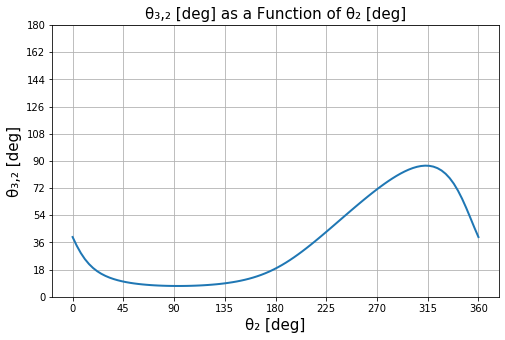

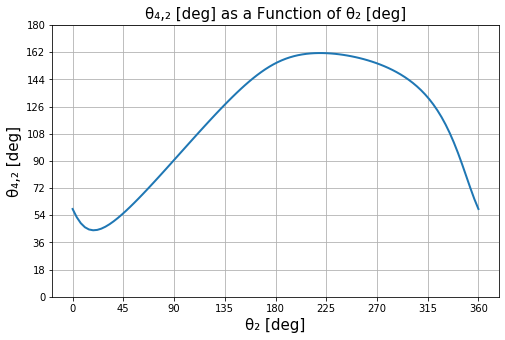

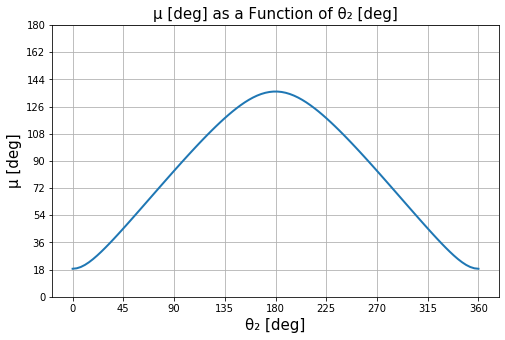

Input Values:
Positions: 
a [in] =  5
b [in] =  8
c [in] =  6
d [in] =  8
θ₂ [deg] =  75

Found Values:
Positions: 
θ₃,₁ [deg] =  -79.02
θ₃,₂ [deg] =  7.5
θ₄,₁ [deg] =  -149.74
θ₄,₂ [deg] =  78.21
μ [deg] =  70.72


In [37]:
a = 5
b = 8
c = 6
d = 8
th_2_fix = 75


k1 = d/a
k2 = d/c
k3 = (a**2-b**2+c**2+d**2)/(2*a*c)
k4 = d/b
k5 = (c**2-d**2-a**2-b**2)/(2*a*b)

Af = np.cos(np.radians(th_2_fix))-k1-k2*np.cos(np.radians(th_2_fix))+k3
Bf = -2*np.sin(np.radians(th_2_fix))
Cf = k1 - (k2+1)*np.cos(np.radians(th_2_fix))+k3
Df = np.cos(np.radians(th_2_fix))-k1+k4*np.cos(np.radians(th_2_fix))+k5
Ef = Bf
Ff = k1 +(k4-1)*np.cos(np.radians(th_2_fix))+k5

th_4_1_fix = 2*np.arctan((-Bf+np.sqrt(Bf**2-4*Af*Cf))/(2*Af))
th_4_2_fix = 2*np.arctan((-Bf-np.sqrt(Bf**2-4*Af*Cf))/(2*Af))

th_3_1_fix = 2*np.arctan((-Ef+np.sqrt(Ef**2-4*Df*Ff))/(2*Df))
th_3_2_fix = 2*np.arctan((-Ef-np.sqrt(Ef**2-4*Df*Ff))/(2*Df))
mu_2_fix = th_4_2_fix - th_3_2_fix


A = np.cos(np.radians(th_2))-k1-k2*np.cos(np.radians(th_2))+k3
B = -2*np.sin(np.radians(th_2))
C = k1 - (k2+1)*np.cos(np.radians(th_2))+k3
D = np.cos(np.radians(th_2))-k1+k4*np.cos(np.radians(th_2))+k5
E = B
F = k1 +(k4-1)*np.cos(np.radians(th_2))+k5

th_4_1 = np.degrees(2*np.arctan((-B+np.sqrt(B**2-4*A*C))/(2*A)))
th_4_2 = np.degrees(2*np.arctan((-B-np.sqrt(B**2-4*A*C))/(2*A)))

th_3_1 = np.degrees(2*np.arctan((-E+np.sqrt(E**2-4*D*F))/(2*D)))
th_3_2 = np.degrees(2*np.arctan((-E-np.sqrt(E**2-4*D*F))/(2*D)))

mu_2 = th_4_2 - th_3_2

########## th_3

fig = plt.figure(figsize = (8,5))
plt.plot(th_2,th_3_2,lw=2)

y_ticks = np.linspace(0,180,11)

plt.yticks(y_ticks)
plt.xticks(x_ticks)
plt.xlabel('\u03B8\u2082 [deg]', fontsize = 15)
plt.ylabel('\u03B8\u2083,\u2082 [deg]', fontsize = 15)
plt.title('\u03B8\u2083,\u2082 [deg] as a Function of \u03B8\u2082 [deg]', fontsize = 15 )
plt.grid()
plt.show()


######### th_4

fig = plt.figure(figsize = (8,5))
plt.plot(th_2,th_4_2,lw=2)

y_ticks = np.linspace(0,180,11)

plt.yticks(y_ticks)
plt.xticks(x_ticks)
plt.xlabel('\u03B8\u2082 [deg]', fontsize = 15)
plt.ylabel('\u03B8\u2084,\u2082 [deg]', fontsize = 15)
plt.title('\u03B8\u2084,\u2082 [deg] as a Function of \u03B8\u2082 [deg]', fontsize = 15 )
plt.grid()
plt.show()


######### Mu

fig = plt.figure(figsize = (8,5))
plt.plot(th_2,mu_2, lw = 2)

y_ticks = np.linspace(0,180,11)

plt.yticks(y_ticks)
plt.xticks(x_ticks)
plt.xlabel('\u03B8\u2082 [deg]', fontsize = 15)
plt.ylabel('\u03BC [deg]', fontsize = 15)
plt.title('\u03BC [deg] as a Function of \u03B8\u2082 [deg]', fontsize = 15 )
plt.grid()
plt.show()



print(color.BOLD + color.BLUE + 'Input Values:' + color.END)
print(color.BOLD + 'Positions: ' + color.END)
print('a [in] = ', a)
print('b [in] = ', b)
print('c [in] = ', c)
print('d [in] = ', d)
print('\u03B8\u2082 [deg] = ', th_2_fix)

print(color.BOLD + color.BLUE + '\nFound Values:' + color.END)
print(color.BOLD + 'Positions: ' + color.END)
print('\u03B8\u2083,\u2081 [deg] = ', round(np.degrees(th_3_1_fix),2))
print('\u03B8\u2083,\u2082 [deg] = ', round(np.degrees(th_3_2_fix),2))
print('\u03B8\u2084,\u2081 [deg] = ', round(np.degrees(th_4_1_fix),2))
print('\u03B8\u2084,\u2082 [deg] = ', round(np.degrees(th_4_2_fix),2))
print('\u03BC [deg] = ', round(np.degrees(mu_2_fix),2))





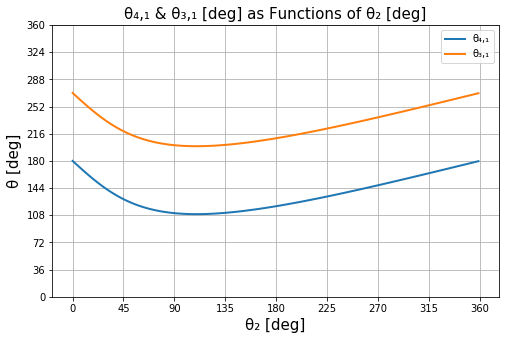

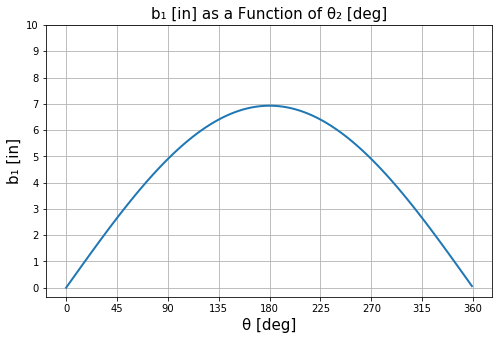

Input Values:
Positions: 
a [in] =  2
c [in] =  4
d [in] =  6
θ₂ [deg] =  30
γ [deg] =  90

Found Values:
Positions: 
θ₃,₁ [deg] =  232.67
θ₃,₂ [deg] =  -79.04
θ₄,₁ [deg] =  142.67
θ₄,₂ [deg] =  -169.04
b₁ [in] =  1.79
b₂ [in] =  -1.79


In [78]:
a = 2
c = 4
d = 6
gam = 90
th_2_fix = 30
th_2 = np.linspace(.01,359,100)


Pf = a*np.sin(np.radians(th_2_fix))*np.sin(np.radians(gam)) + (a*np.cos(np.radians(th_2_fix)-d))*np.cos(np.radians(gam))
Qf = -a*np.sin(np.radians(th_2_fix))*np.cos(np.radians(gam)) + (a*np.cos(np.radians(th_2_fix))-d)*np.sin(np.radians(gam))     
Rf = -c*np.sin(np.radians(gam))
Sf = Rf-Qf
Tf = 2*Pf
Uf = Qf+Rf

th_4_1_fix = np.degrees(2*np.arctan((-Tf+np.sqrt(Tf**2-4*Sf*Uf))/(2*Sf)))
th_4_2_fix = np.degrees(2*np.arctan((-Tf-np.sqrt(Tf**2-4*Sf*Uf))/(2*Sf)))

th_3_1_fix = th_4_1_fix + gam
th_3_2_fix = th_4_2_fix + gam
                                                                
b1f = (a*np.sin(np.radians(th_2_fix))-c*np.sin(np.radians(th_4_1_fix)))/(np.sin(np.radians(th_4_1_fix+gam)))
b2f = (a*np.sin(np.radians(th_2_fix))-c*np.sin(np.radians(th_4_2_fix)))/(np.sin(np.radians(th_4_2_fix+gam)))


P = a*np.sin(np.radians(th_2))*np.sin(np.radians(gam)) + (a*np.cos(np.radians(th_2)-d))*np.cos(np.radians(gam))
Q = -a*np.sin(np.radians(th_2))*np.cos(np.radians(gam)) + (a*np.cos(np.radians(th_2))-d)*np.sin(np.radians(gam))     
R = -c*np.sin(np.radians(gam))
S = R-Q
T = 2*P
U = Q+R


th_4_1 = np.degrees(2*np.arctan((-T+np.sqrt(T**2-4*S*U))/(2*S)))
th_4_2 = np.degrees(2*np.arctan((-T-np.sqrt(T**2-4*S*U))/(2*S)))
 
    
th_3_1 = th_4_1 + gam
th_3_2 = th_4_2 + gam
                                                                
b1 = (a*np.sin(np.radians(th_2))-c*np.sin(np.radians(th_4_1)))/(np.sin(np.radians(th_4_1+gam)))
b2 = (a*np.sin(np.radians(th_2))-c*np.sin(np.radians(th_4_2)))/(np.sin(np.radians(th_4_2+gam)))


######### th_4_1 & th_4_1

fig = plt.figure(figsize = (8,5))
plt.plot(th_2,th_4_1, lw = 2, label = '\u03B8\u2084,\u2081')
plt.plot(th_2,th_3_1, lw = 2, label = '\u03B8\u2083,\u2081')
y_ticks = np.linspace(0,360,11)

plt.yticks(y_ticks)
plt.xticks(x_ticks)
plt.xlabel('\u03B8\u2082 [deg]', fontsize = 15)
plt.ylabel('\u03B8 [deg]', fontsize = 15)
plt.title('\u03B8\u2084,\u2081 & \u03B8\u2083,\u2081 [deg] as Functions of \u03B8\u2082 [deg]', fontsize = 15 )
plt.grid()
plt.legend()
plt.show()


######### th_4_1 & th_4_1

fig = plt.figure(figsize = (8,5))
plt.plot(th_2,b1, lw = 2)
y_ticks = np.linspace(0,10,11)

plt.yticks(y_ticks)
plt.xticks(x_ticks)
plt.xlabel('\u03B8 [deg]', fontsize = 15)
plt.ylabel('b\u2081 [in]', fontsize = 15)
plt.title('b\u2081 [in] as a Function of \u03B8\u2082 [deg]', fontsize = 15 )
plt.grid()
plt.show()


print(color.BOLD + color.BLUE + 'Input Values:' + color.END)
print(color.BOLD + 'Positions: ' + color.END)
print('a [in] = ', a)
print('c [in] = ', c)
print('d [in] = ', d)
print('\u03B8\u2082 [deg] = ', th_2_fix)
print('\u03B3 [deg] = ', gam)

print(color.BOLD + color.BLUE + '\nFound Values:' + color.END)
print(color.BOLD + 'Positions: ' + color.END)
print('\u03B8\u2083,\u2081 [deg] = ', round(th_3_1_fix,2))
print('\u03B8\u2083,\u2082 [deg] = ', round(th_3_2_fix,2))
print('\u03B8\u2084,\u2081 [deg] = ', round(th_4_1_fix,2))
print('\u03B8\u2084,\u2082 [deg] = ', round(th_4_2_fix,2))
print('b\u2081 [in] = ', round(b1f,2))
print('b\u2082 [in] = ', round(b2f,2))                                               